# 'El discurso de Gastón': Un acercamiento *computacional* al análisis del discurso

# Librerías utilizadas

In [ ]:
import nltk 
import pandas as pd
import spacy
import numpy as np
import wordtree
import networkx as nx
from matplotlib import pyplot as plt   
from nltk import sent_tokenize
from pyvis.network import Network
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
nlp = spacy.load('es_dep_news_trf')   # Modelo 

# Análisis

## Importar los datos 

In [373]:
discurso = open("discurso_gaston.txt")
discurso = discurso.read()

## Limpieza y pre-procesamiento de los datos

#### Definir la función preprocess_o 

In [472]:
def preprocess_o(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.like_num or token.pos_ in ['AUX']]
    return " ".join(tokens)

#### Tokenizar en oraciones los datos

In [481]:
oraciones_discurso = sent_tokenize(discurso.lower())

oraciones = []
for o in oraciones_discurso:
    oraciones = oraciones + [preprocess_o(o)]

## Organización de los datos en un Dataframe

### Crear columna de oraciones 

In [482]:
df = pd.DataFrame(oraciones)
df.columns = ['oraciones']

### Agregar columna de verbos y verbos-auxiliares (lemmatizados) 

In [483]:
# Verbos
V = [] 
Vlemma = [] 

#Auxiliares
A = [] 
Alemma = []

# N = [] # noun

for oracion in oraciones:
    o = nlp(oracion)
    V = V + [[token.text for token in o if token.pos_ in ['VERB']]]
    Vlemma = Vlemma + [[token.lemma_ for token in o if token.pos_ in ['VERB']]]
   # A = A + [[token.text for token in o if token.pos_ in ['AUX']]]
    Alemma = Alemma + [[token.lemma_ for token in o if token.pos_ in ['AUX']]]
    N = N + [[token.text for token in o if token.pos_ in ['NOUN']]]
    
df['Verbos'] = V
df['Verblemma'] = Vlemma
df['Auxlemma'] = Alemma
#df['Aux'] = A
# df['Noun'] = N

df

,oraciones,Verbos,Verblemma,Auxlemma
0,poder pensar recurso natural país haber ser be...,"[pensar, enseñar]","[pensar, enseñar]","[poder, haber, ser, haber]"
1,ser caucho guano ser mineral,[],[],"[ser, ser]"
2,acabar terminar ciclo económico bonanza aparec...,"[acabar, terminar, aparecer, destruir]","[acabar, terminar, aparecer, destruir]",[]
3,quedar crecimiento estabilidad riqueza país es...,"[quedar, estar, elaborar]","[quedar, estar, elaborar]",[]
4,suizo comprar recurso cacao oro elaborar choco...,"[comprar, elaborar, comprar, transformar]","[comprar, elaborar, comprar, transformar]",[]
...,...,...,...,...
119,terminar querer decir él realidad pedir él ir ...,"[terminar, decir, pedir, ir]","[terminar, decir, pedir, ir]","[querer, ser]"
120,salir estudiar maestría regresen,"[salir, estudiar, regresen]","[salir, estudiar, regresen]",[]
121,ir ser oportunidad ser riqueza ser vida sentido,[],[],"[ir, ser, ser, ser]"
122,ir pueblo necesitar perú necesitar historia ne...,"[necesitar, necesitar, necesitar]","[necesitar, necesitar, necesitar]",[ir]


### Verbos

In [504]:
aux = (list(chain(*df['Auxlemma'])))
verbos = list(chain(*df['Verblemma']))
verbos = verbos + aux

print('el total de verbos es' +  str(len(verbos)))
f'el total de verbos diferentes es {len(set(verbos))}'

el total de verbos es501


'el total de verbos diferentes es 193'

#### Crear un diccionario {(verbos: frecuencia de aparición)} [solo los 5 más frecuentes]

In [477]:
d ={}
for i in verbos:
    if i in d.keys():
        d[i] = 1 + d[i]
    else:
        d[i] = 1
d = sorted(d.items(), key=lambda x: x[1], reverse=True)
d = dict(d[:5])
d

{'ser': 63, 'haber': 38, 'estar': 20, 'poder': 18, 'crear': 9}

### Histograma del top 5 verbos en los datos

<Axes: title={'center': 'Top verbos'}, xlabel='verbos'>

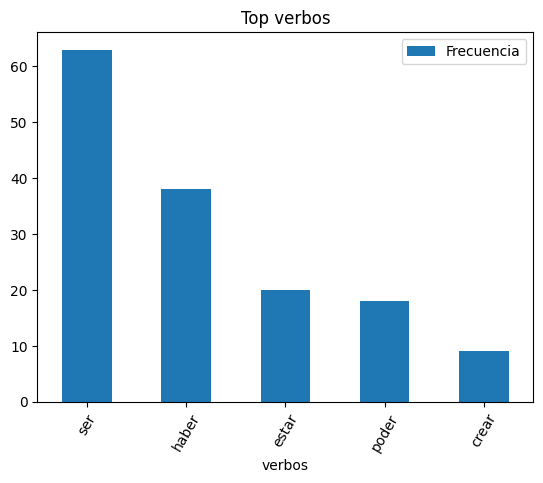

In [478]:
d = {'verbos':d.keys(), 'Frecuencia':d.values()}
df = pd.DataFrame.from_dict(d)
ax = df.plot.bar(x='verbos', y='Frecuencia', rot=60, title='Top verbos')
ax

### Lista de verbos

In [508]:
verbos = set(verbos)
print(verbos)

{'elitar', 'cocina', 'admirar', 'comer', 'simplificar', 'llamar', 'vender', 'rebatir', 'enseñar', 'prevalecer', 'argumentar', 'dirigir', 'faltar', 'necesitar', 'dividir', 'transformar', 'cautivar', 'indicar', 'definir', 'alzar', 'renunciar', 'emitir', 'ganar', 'fracasar', 'repreguntar', 'ir', 'llegar', 'multiplicar', 'conceder', 'satisfacer', 'devolver', 'ubicar', 'broaster', 'acabar', 'llevar', 'mantener', 'empezar', 'carecer', 'suponer', 'considerar', 'cuestionar', 'despegar', 'preguntar', 'alcanzar', 'producir', 'bajar', 'introducir', 'encontrar', 'ofrecer', 'ver', 'incite', 'analizar', 'esconder', 'adornar', 'expandir', 'rebasar', 'visitar', 'traducir', 'poder', 'aparecer', 'cuestionabl', 'contar', 'imitar', 'condenar', 'depender', 'buscar', 'entender', 'quedar', 'deber', 'mejorar', 'formar', 'apreciar', 'encarar', 'representar', 'crear', 'inaugurar', 'permitir', 'destruir', 'descubrir', 'reacomodar', 'globalizar', 'pensar', 'aceptar', 'cubrir', 'salir', 'enviar', 'mostrar', 'cambi

#### Pre-procesar los datos y eliminar el pronombre 'él' y los verbos auxiliares 'ser', 'haber', 'poder' y 'estar'

In [428]:
discurso = preprocess_o(discurso.replace("él", "").replace("ser","").replace("haber","").replace("poder","").replace("estar","")) 
# 'él' genera ruido, pues es agregado por por el lemmatizador de spaCy
# También se eliminan los verbos auxiliares 'ser', 'haber', 'poder' y 'estar'

#### Definir la función get_top_grams 

In [429]:
# Definir función que muestra top palabras (unigrams) 
# Bag of Words (BoW)

def get_top_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Crear un diccionario con las palabras más frecuentes y significativos en los datos

In [430]:
a = dict(get_top_grams([discurso], n=10))
a = {'palabras':a.keys(), 'Frecuencia':a.values()}
print(a)

{'palabras': dict_keys(['peruano', 'mundo', 'marca', 'concepto', 'país', 'producto', 'restaurante', 'cocina', 'perú', 'crear']), 'Frecuencia': dict_values([45, 24, 20, 19, 17, 17, 16, 13, 12, 10])}


#### Crear un DataFrame {(palabra:frecuencia)} a partir del diccionario de palabras frecuentes y significativas

In [431]:
df = pd.DataFrame.from_dict(a)
df

,palabras,Frecuencia
0,peruano,45
1,mundo,24
2,marca,20
3,concepto,19
4,país,17
5,producto,17
6,restaurante,16
7,cocina,13
8,perú,12
9,crear,10


#### Crear una lista a partir de la columna 'palabras' del DataFrame de palabras más frecuentes y significativas

In [433]:
P = list(a['palabras'])
P # servirá para elaborar una red de textos 

['peruano',
 'mundo',
 'marca',
 'concepto',
 'país',
 'producto',
 'restaurante',
 'cocina',
 'perú',
 'crear']

#### Generar un histograma a partir del diccionario de palabras más frecuentes y significativas

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'peruano'),
  Text(1, 0, 'mundo'),
  Text(2, 0, 'marca'),
  Text(3, 0, 'concepto'),
  Text(4, 0, 'país'),
  Text(5, 0, 'producto'),
  Text(6, 0, 'restaurante'),
  Text(7, 0, 'cocina'),
  Text(8, 0, 'perú'),
  Text(9, 0, 'crear')])

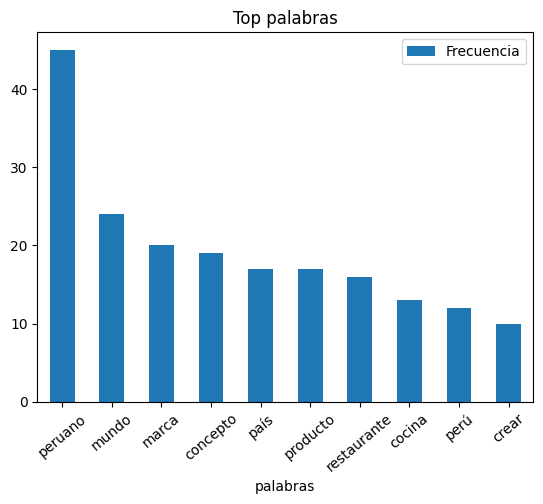

In [434]:
ax = df.plot.bar(x='palabras', y='Frecuencia', rot=0, title='Top palabras')
plt.xticks(rotation=40)

## Exploración de n-gramas

#### Definir la función get_top_bigrams

In [389]:
def get_top_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Utilizar la función get_top_bigrams y visualizar los resultados en un DataFrame

In [388]:
top_bigrams = dict(get_top_bigrams([discurso], n=5))
b = {'palabra':top_bigrams.keys(), 'Frecuencia':top_bigrams.values()}
df = pd.DataFrame.from_dict(b)
df

,palabra,Frecuencia
0,el mundo,18
1,de los,15
2,de la,13
3,por el,12
4,no solo,11


## Red de palabras del top 5 bi-gramas

#### Elaborar una red de palabras a partir del DataFrame de top bi-gramas

In [387]:
B = []
for b in top_bigrams.keys():
    r = b.split(' ')
    B = B + [(r[0],r[1])]

plt.figure(figsize=(4,4))
G = nx.DiGraph()
G.add_edges_from(B)
net = Network(notebook = True, 
              width = "500px",
              height="400px",
              bgcolor = "white",
             font_color = "black",
             directed=True)


net.from_nx(G)
net.show("bigrams.html")

bigrams.html


<Figure size 400x400 with 0 Axes>

## Red de palabras (Palabras significativas <---> verbos) 

#### Realizar un diccionar de tuplas: vincula las frases nominales (que incluyen los palabras más frecuentes y significativas) y los verbos

In [441]:
doc=nlp(preprocess_o(discurso.lower()))

D = []
for palabra in doc.noun_chunks:
    
    if palabra.root.head.text in verbos and palabra.root.text in P:
        D = D + [(palabra.root.text, palabra.root.head.text)]
print(D)

[('país', 'pensar'), ('producto', 'estar'), ('país', 'comprar'), ('producto', 'comprar'), ('mundo', 'expandir'), ('mundo', 'comprar'), ('perú', 'comprar'), ('producto', 'crear'), ('mundo', 'exportar'), ('cocina', 'comprar'), ('cocina', 'comprar'), ('concepto', 'crear'), ('producto', 'convertir'), ('producto', 'convertir'), ('concepto', 'codear'), ('mundo', 'expandir'), ('concepto', 'indicar'), ('restaurante', 'invertir'), ('perú', 'invertir'), ('cocina', 'vivir'), ('perú', 'visitar'), ('restaurante', 'crear'), ('producto', 'disponer'), ('restaurante', 'invertir'), ('marca', 'rechazar'), ('concepto', 'decidir'), ('marca', 'necesitar'), ('concepto', 'desarrollar'), ('restaurante', 'empezar'), ('restaurante', 'definir'), ('marca', 'preparar'), ('producto', 'devaluar'), ('cocina', 'devaluar'), ('restaurante', 'llamar'), ('mundo', 'encontrar'), ('concepto', 'crear'), ('concepto', 'abrir'), ('marca', 'esperar'), ('mundo', 'expandecir'), ('marca', 'compita'), ('marca', 'hacer'), ('perú', 'hac

#### Crear una red de palabras a partir del diccionario de tuplas D

In [438]:
plt.figure(figsize=(12,12))
G = nx.Graph()
G.add_edges_from(D)

net = Network(notebook = True, 
              width = "1000px",
              height="900px",
              bgcolor = "white",
             font_color = "black")

node_degree = dict(G.degree)

nx.set_node_attributes(G,node_degree,'size')

net.from_nx(G)
net.show("red.html")

red.html


<Figure size 1200x1200 with 0 Axes>

# Bibliografía

*NLTK*
Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.". 

*Pandas*
Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)

*Spacy*
Honnibal, M., & Montani, I. (2017). spaCy 2: Natural language understanding with Bloom embeddings, convolutional neural networks and incremental parsing.

*Numpy*
Charles R. Harris, K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, Julian Taylor, Sebastian Berg, Nathaniel J. Smith, Robert Kern, Matti Picus, Stephan Hoyer, Marten H. van Kerkwijk, Matthew Brett, Allan Haldane, Jaime Fernández del Río, Mark Wiebe, Pearu Peterson, Pierre Gérard-Marchant, Kevin Sheppard, Tyler Reddy, Warren Weckesser, Hameer Abbasi, Christoph Gohlke & Travis E. Oliphant. Array programming with NumPy, Nature, 585, 357–362 (2020), DOI:10.1038/s41586-020-2649-2

*Networkx*
Hagberg, A., Swart, P., & S Chult, D. (2008). Exploring network structure, dynamics, and function using NetworkX (No. LA-UR-08-05495; LA-UR-08-5495). Los Alamos National Lab.(LANL), Los Alamos, NM (United States).

*Matplotlib*
Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in science & engineering, 9(03), 90-95.
